# 1. Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Breast Cancer Coimbra Classification Data Set</h2>

Input Features: 
'Age (years)', 'BMI (kg/m2)', 'Glucose (mg/dL)', 'Insulin (µU/mL)', 'HOMA', 'Leptin (ng/mL)', 'Adiponectin (µg/mL)', 'Resistin (ng/mL)', 'MCP-1(pg/dL)'<br>

Target Feature: 
'Classification'<br>

Objective: Predict classification labels<br>

<h4>Labels:
    
1=Healthy controls ; 2=Patients</h4>

<h4>Data Source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra# </h4>

In [2]:
columns = ['Classification','Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 
           'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']

In [3]:
df = pd.read_csv('dataR2.csv')

In [4]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [6]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [7]:
# Look for any columns that have NA
df.isna().any(axis=0)

Age               False
BMI               False
Glucose           False
Insulin           False
HOMA              False
Leptin            False
Adiponectin       False
Resistin          False
MCP.1             False
Classification    False
dtype: bool

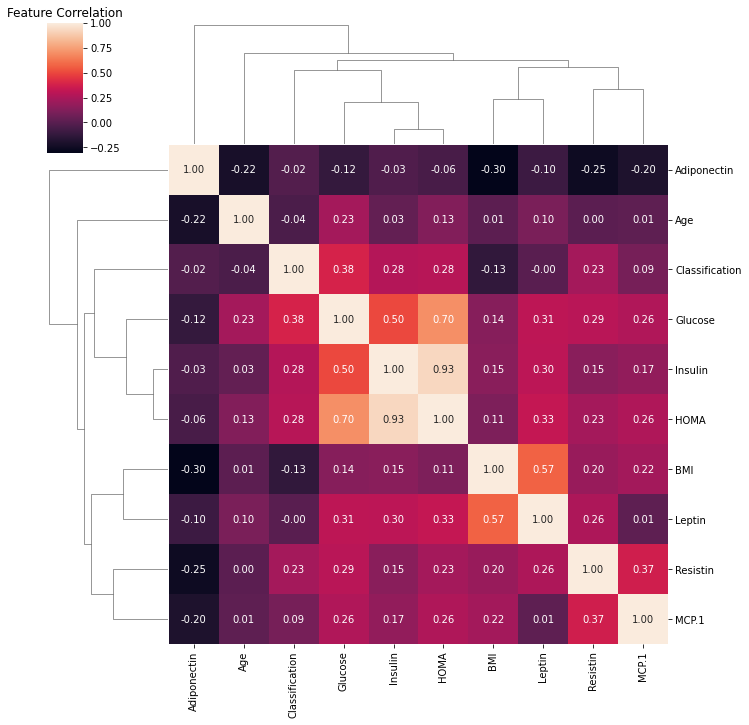

In [8]:
corr_matrix = df.corr()

sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Feature Correlation")
plt.show()

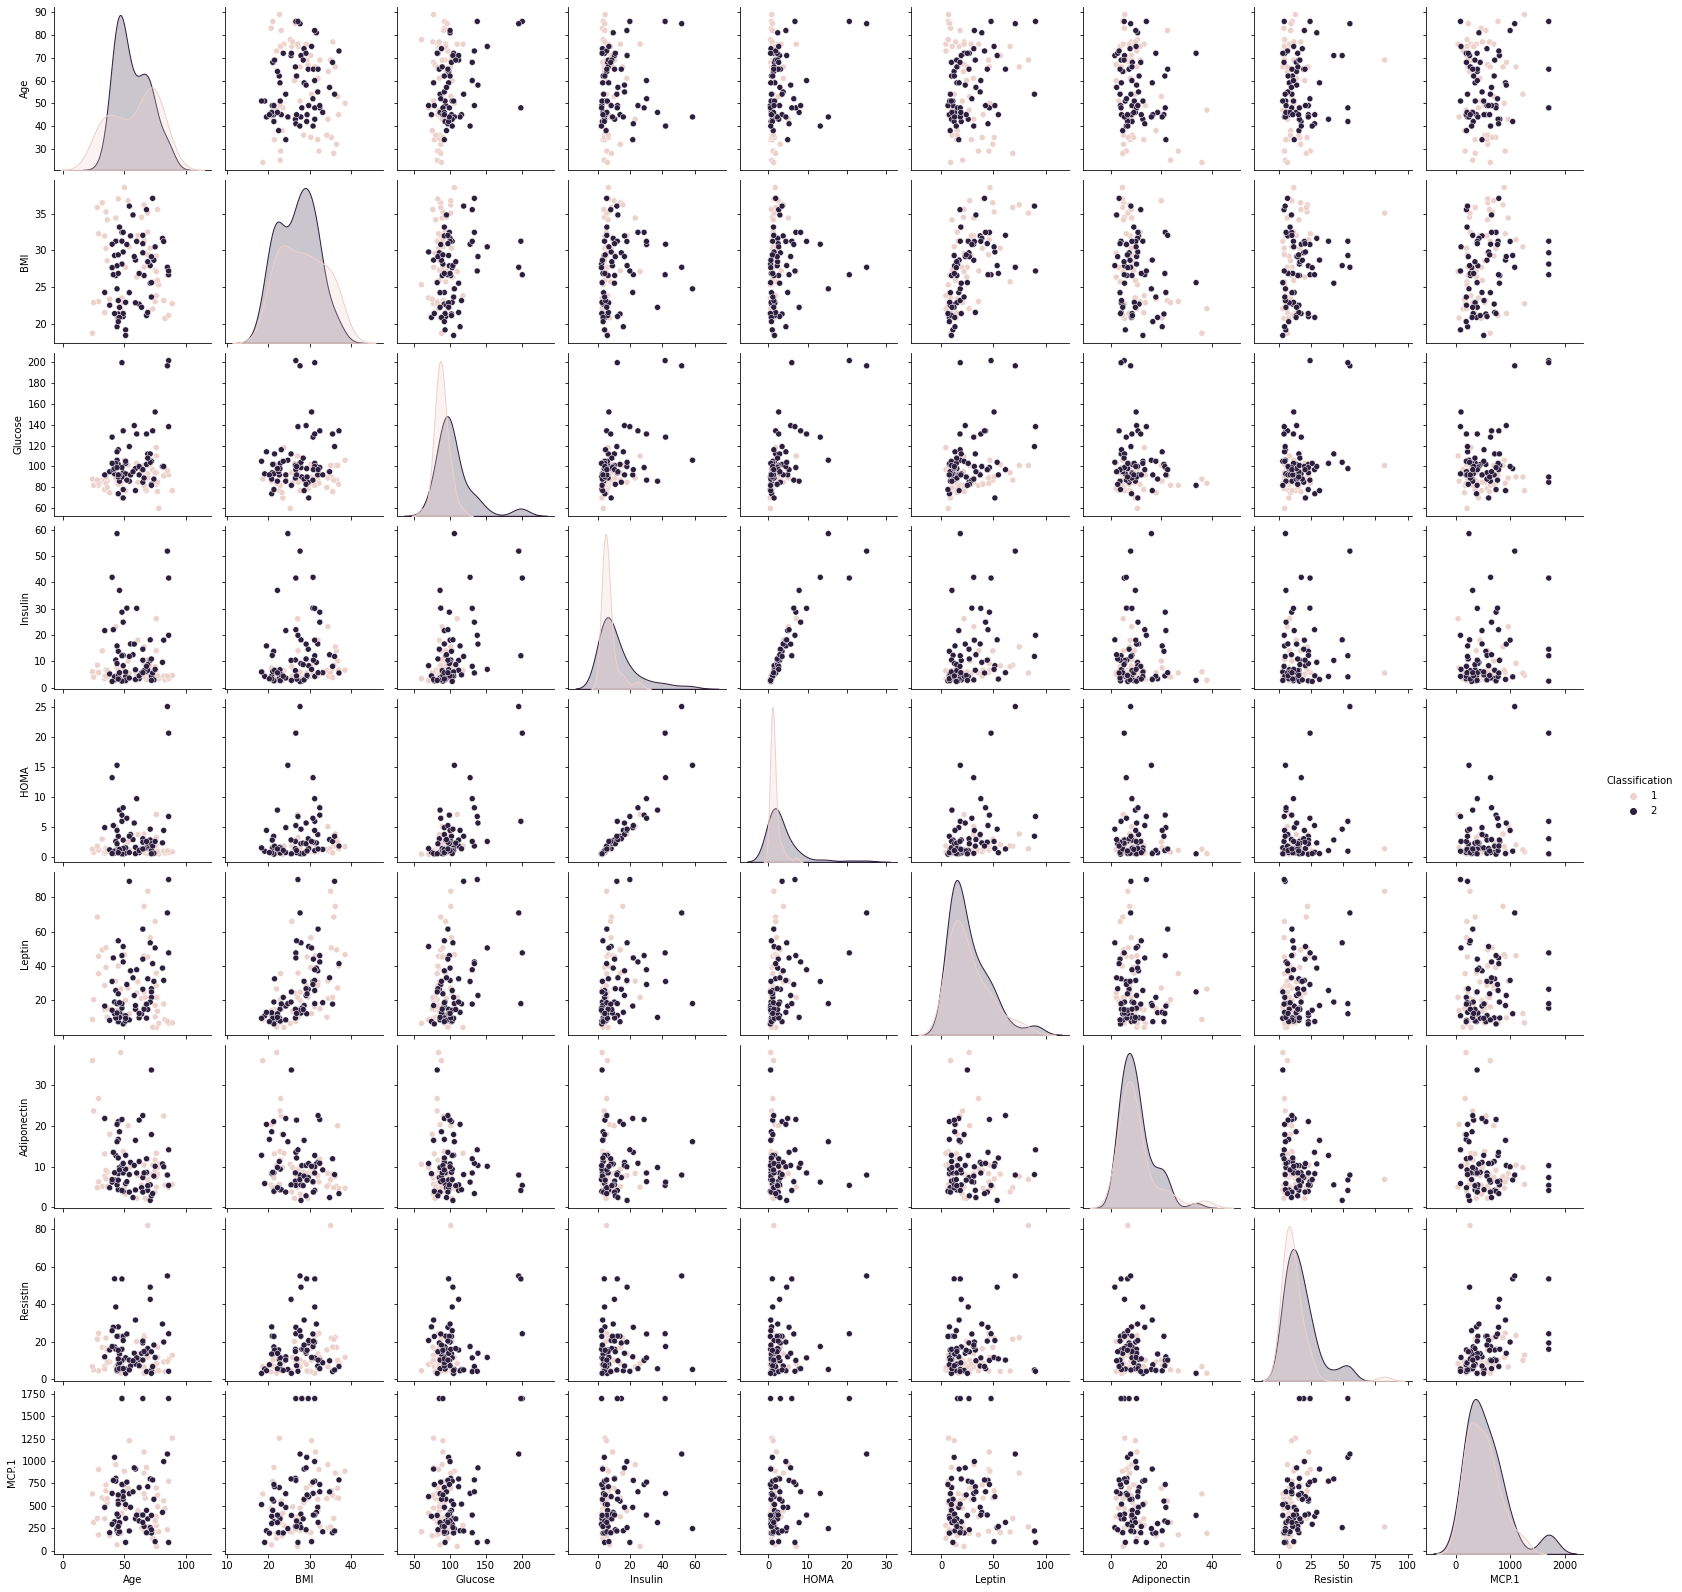

In [9]:
sns.pairplot(df, hue = "Classification");

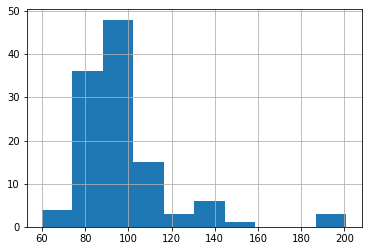

In [10]:
df['Glucose'].hist()
plt.show()

In [11]:
df['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [12]:
# Separate healthy controls and patients
healthy = df.Classification == 1
patient = df.Classification == 2

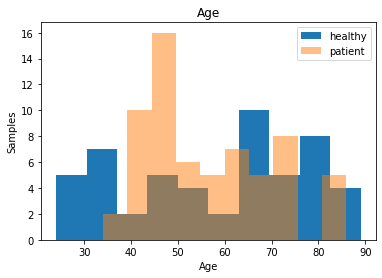

In [13]:
# Age histogram
plt.hist(df[healthy].Age,label='healthy')
plt.hist(df[patient].Age,alpha=0.5,label='patient')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Samples')
plt.legend()
plt.show()

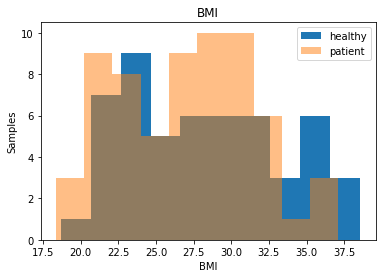

In [14]:
# BMI (Body Mass Index) histogram
plt.hist(df[healthy].BMI,label='healthy')
plt.hist(df[patient].BMI,alpha=0.5,label='patient')
plt.title('BMI')
plt.xlabel('BMI')
plt.ylabel('Samples')
plt.legend()
plt.show()

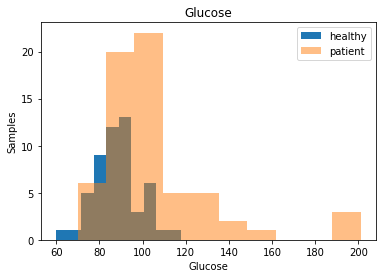

In [15]:
# Glucose histogram
plt.hist(df[healthy].Glucose,label='healthy')
plt.hist(df[patient].Glucose,alpha=0.5,label='patient')
plt.title('Glucose')
plt.xlabel('Glucose')
plt.ylabel('Samples')
plt.legend()
plt.show()

#  2. Training and Validation Set
### Target Variable as first column followed by input features:
'Classification','Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 
'Leptin', 'Adiponectin', 'Resistin', 'MCP.1'
### Training, Validation files do not have a column header 

In [16]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [17]:
rows = df.shape[0]
train = int(.7 * rows)
test = rows - train

In [18]:
rows, train, test

(116, 81, 35)

In [19]:
# Write Training Set
df[:train].to_csv('coimbra_train.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=columns)

In [20]:
# Write Test Set
df[train:].to_csv('coimbra_validation.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=columns)

In [21]:
# Write Column List
with open('coimbra_train_column_list.txt','w') as f:
    f.write(','.join(columns))

# Cancer Coimbra dataset 
### Predict if a person is healthy or a patient
### Binary Classification problem 

In [22]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import sklearn
import xgboost as xgb

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree

In [23]:
column_list_file = 'coimbra_train_column_list.txt'
train_file = 'coimbra_train.csv'
validation_file = 'coimbra_validation.csv'

In [24]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [25]:
columns

['Classification',
 'Age',
 'BMI',
 'Glucose',
 'Insulin',
 'HOMA',
 'Leptin',
 'Adiponectin',
 'Resistin',
 'MCP.1']

In [26]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [27]:
df_train.head()

,Classification,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,1,69,35.092702,101,5.646,1.406607,83.4821,6.796985,82.10000,263.499
1,1,75,27.300000,85,5.197,1.089638,10.3900,9.000805,7.57670,335.393
2,2,49,32.461911,134,24.887,8.225983,42.3914,10.793940,5.76800,656.393
3,1,61,32.038959,85,18.077,3.790144,30.7729,7.780255,13.68392,444.395
4,1,35,30.276817,84,4.376,0.906707,39.2134,9.048185,16.43706,733.797


In [28]:
df_validation.head()

,Classification,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,2,54,36.050000,119,11.910,3.495982,89.2700,8.010000,5.06000,218.280
1,2,48,32.461911,99,28.677,7.002923,46.0760,21.570000,10.15726,738.034
2,1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
3,2,73,37.109375,134,5.636,1.862886,41.4064,3.335665,6.89235,788.902
4,1,76,27.200000,94,14.070,3.262364,35.8910,9.346630,8.41560,377.227


In [29]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [62]:
def models(X_train,y_train):
    
    #Logistic Regressions
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(random_state = 0)
    lr.fit(X_train, y_train) 
               
    
    #KNN Neighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, y_train) 
    
    #SVMC
    from sklearn.svm import SVC
    svmc = SVC(kernel = 'linear', random_state = 0)
    svmc.fit(X_train, y_train) 
    
    #KSVMC
    from sklearn.svm import SVC
    ksvmc = SVC(kernel = 'rbf', random_state = 0)
    ksvmc.fit(X_train, y_train) 

    #Gaussian Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    gnb.fit(X_train, y_train) 

    #Desicion Tree Classifier
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    dtc.fit(X_train, y_train) 
    
    #Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    rfc.fit(X_train, y_train)
    
    #XGBoost
    import xgboost as xgb
    xgbst = xgb.XGBClassifier (objective="binary:logistic")
    xgbst.fit(X_train,
               y_train, 
               eval_set = [(X_train, y_train), (X_validation, y_validation)], 
               eval_metric=['logloss'],
               early_stopping_rounds=10)

    print('Model Accuracy')
    acc_lr = lr.score(X_train, y_train)
    acc_knn = knn.score(X_train, y_train)
    acc_svmc = svmc.score(X_train, y_train)
    acc_ksvmc = ksvmc.score(X_train, y_train)
    acc_gnb = gnb.score(X_train, y_train)
    acc_dtc = dtc.score(X_train, y_train)
    acc_rfc = rfc.score(X_train, y_train)
    acc_xgbst = xgbst.score(X_train, y_train)
    
    print('[0] Accuracy Training Logistic Regressions: {}%'.format(acc_lr*100))
    print('[1] Accuracy Training KNN Neighbors: {}%'.format(acc_knn*100))
    print('[2] Accuracy Training SVMC: {}%'.format(acc_svmc*100))
    print('[3] Accuracy Training KSVMC: {}%'.format(acc_ksvmc*100))
    print('[4] Accuracy Training Gaussian Naive Bayes: {}%'.format(acc_gnb*100))
    print('[5] Accuracy Training Decision Tree Classifier: {}%'.format(acc_dtc*100))
    print('[6] Accuracy Training Random Forest Classifier: {}%'.format(acc_rfc*100))
    print('[7] Accuracy Training XGboost: {}%'.format(acc_xgbst*100))
    
    return lr, knn, svmc, ksvmc, gnb, dtc, rfc, xgbst

model = models(X_train,y_train)

C:\Users\rifqiarfa\anaconda3\envs\aws\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0]	validation_0-logloss:0.650098	validation_1-logloss:0.674143
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.607913	validation_1-logloss:0.659935
[2]	validation_0-logloss:0.569216	validation_1-logloss:0.660164
[3]	validation_0-logloss:0.537208	validation_1-logloss:0.656126
[4]	validation_0-logloss:0.509769	validation_1-logloss:0.653216
[5]	validation_0-logloss:0.479951	validation_1-logloss:0.651753
[6]	validation_0-logloss:0.458143	validation_1-logloss:0.663215
[7]	validation_0-logloss:0.433897	validation_1-logloss:0.663603
[8]	validation_0-logloss:0.415957	validation_1-logloss:0.668375
[9]	validation_0-logloss:0.401079	validation_1-logloss:0.683554
[10]	validation_0-logloss:0.386758	validation_1-logloss:0.693704
[11]	validation_0-logloss:0.371239	validation_1-logloss:0.680877
[12]	validation_0-logloss:0.359318	validation_1-logloss:0.679366


In [63]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model ',i)
  #Print precision, recall, f1-score
  print( classification_report(y_validation, model[i].predict(X_validation)) )
  #Alternative to show the models accuracy on the test data
  print( accuracy_score(y_validation, model[i].predict(X_validation)))
  print()#Print a new line

Model  0
              precision    recall  f1-score   support

           1       0.40      0.67      0.50        12
           2       0.73      0.48      0.58        23

    accuracy                           0.54        35
   macro avg       0.57      0.57      0.54        35
weighted avg       0.62      0.54      0.55        35

0.5428571428571428

Model  1
              precision    recall  f1-score   support

           1       0.33      0.42      0.37        12
           2       0.65      0.57      0.60        23

    accuracy                           0.51        35
   macro avg       0.49      0.49      0.49        35
weighted avg       0.54      0.51      0.52        35

0.5142857142857142

Model  2
              precision    recall  f1-score   support

           1       0.38      0.67      0.48        12
           2       0.71      0.43      0.54        23

    accuracy                           0.51        35
   macro avg       0.55      0.55      0.51        35
weighte

# Details for XGBoost Model

In [32]:
# Launch a classifier
# XGBoost Training Parameter Reference: 
#   https://xgboost.readthedocs.io/en/latest/parameter.html
classifier = xgb.XGBClassifier (objective="binary:logistic")

In [33]:
classifier

XGBClassifier()

In [34]:
classifier.fit(X_train,
               y_train, 
               eval_set = [(X_train, y_train), (X_validation, y_validation)], 
               eval_metric=['logloss'],
               early_stopping_rounds=10)

[0]	validation_0-logloss:0.650098	validation_1-logloss:0.674143
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.607913	validation_1-logloss:0.659935
[2]	validation_0-logloss:0.569216	validation_1-logloss:0.660164
[3]	validation_0-logloss:0.537208	validation_1-logloss:0.656126
[4]	validation_0-logloss:0.509769	validation_1-logloss:0.653216
[5]	validation_0-logloss:0.479951	validation_1-logloss:0.651753
[6]	validation_0-logloss:0.458143	validation_1-logloss:0.663215
[7]	validation_0-logloss:0.433897	validation_1-logloss:0.663603
[8]	validation_0-logloss:0.415957	validation_1-logloss:0.668375
[9]	validation_0-logloss:0.401079	validation_1-logloss:0.683554
[10]	validation_0-logloss:0.386758	validation_1-logloss:0.693704
[11]	validation_0-logloss:0.371239	validation_1-logloss:0.680877
[12]	validation_0-logloss:0.359318	validation_1-logloss:0.679366


XGBClassifier()

In [35]:
eval_result = classifier.evals_result()

In [36]:
training_rounds = range(len(eval_result['validation_0']['logloss']))

In [37]:
print(training_rounds)

range(0, 15)


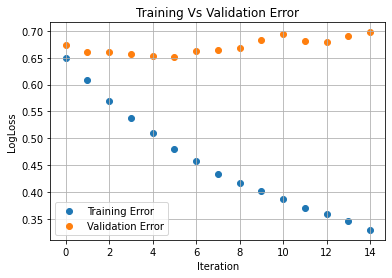

In [38]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['logloss'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['logloss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('LogLoss')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

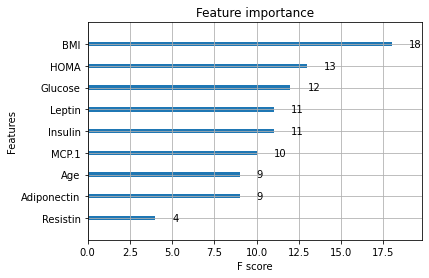

In [39]:
xgb.plot_importance(classifier)
plt.show()

In [40]:
df = pd.read_csv(validation_file,names=columns)

In [41]:
df.head()

,Classification,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,2,54,36.050000,119,11.910,3.495982,89.2700,8.010000,5.06000,218.280
1,2,48,32.461911,99,28.677,7.002923,46.0760,21.570000,10.15726,738.034
2,1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
3,2,73,37.109375,134,5.636,1.862886,41.4064,3.335665,6.89235,788.902
4,1,76,27.200000,94,14.070,3.262364,35.8910,9.346630,8.41560,377.227


In [42]:
X_test = df.iloc[:,1:]

In [43]:
result = classifier.predict(X_test)

In [44]:
result[:5]

array([1, 2, 2, 1, 2], dtype=int64)

In [45]:
df['predicted_class'] = result

In [46]:
df.head()

,Classification,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,predicted_class
0,2,54,36.050000,119,11.910,3.495982,89.2700,8.010000,5.06000,218.280,1
1,2,48,32.461911,99,28.677,7.002923,46.0760,21.570000,10.15726,738.034,2
2,1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,2
3,2,73,37.109375,134,5.636,1.862886,41.4064,3.335665,6.89235,788.902,1
4,1,76,27.200000,94,14.070,3.262364,35.8910,9.346630,8.41560,377.227,2


## Binary Classifier Metrics

In [47]:
# Reference: https://scikit-learn.org/stable/modules/model_evaluation.html
# Explicitly stating labels. Pass=2, Fail=1
def true_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,2])[0, 0]

def true_negative(y_true, y_pred): 
    return confusion_matrix(y_true,y_pred,labels=[1,2])[1, 1]

def false_positive(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,2])[1, 0]

def false_negative(y_true, y_pred): 
    return confusion_matrix(y_true, y_pred,labels=[1,2])[0, 1]

In [48]:
# Compute Binary Classifier Metrics
# Returns a dictionary {"MetricName":Value,...}

def binary_classifier_metrics(y_true, y_pred):
    metrics = {}

    # References: 
    #  https://docs.aws.amazon.com/machine-learning/latest/dg/binary-classification.html
    #  https://en.wikipedia.org/wiki/Confusion_matrix
    
    # Definition:
    # true positive = tp = how many samples were correctly classified as positive (count)
    # true negative = tn = how many samples were correctly classified as negative (count)
    # false positive = fp = how many negative samples were mis-classified as positive (count)
    # false_negative = fn = how many positive samples were mis-classified as negative (count)
    
    # positive = number of positive samples (count)
    #          = true positive + false negative
    # negative = number of negative samples (count)
    #          = true negative + false positive
    
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    positive = tp + fn
    negative = tn + fp
    
    metrics['TruePositive'] = tp
    metrics['TrueNegative'] = tn
    metrics['FalsePositive'] = fp
    metrics['FalseNegative'] = fn
    
    metrics['Positive'] = positive
    metrics['Negative'] = negative
    
    # True Positive Rate (TPR, Recall) = true positive/positive
    # How many positives were correctly classified? (fraction)
    # Recall value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        recall = 0
    else:
        recall = tp/positive
        
    metrics['Recall'] = recall
    
    # True Negative Rate = True Negative/negative
    # How many negatives were correctly classified? (fraction)
    # True Negative Rate value closer to 1 is better. closer to 0 is worse
    if tn == 0:
        tnr = 0
    else:
        tnr = tn/(negative)
    metrics['TrueNegativeRate'] = tnr
    
    # Precision = True Positive/(True Positive + False Positive)
    # How many positives classified by the algorithm are really positives? (fraction)
    # Precision value closer to 1 is better. closer to 0 is worse
    if tp == 0:
        precision = 0
    else:
        precision = tp/(tp + fp)
    metrics['Precision'] = precision
    
    # Accuracy = (True Positive + True Negative)/(total positive + total negative)
    # How many positives and negatives were correctly classified? (fraction)
    # Accuracy value closer to 1 is better. closer to 0 is worse
    accuracy = (tp + tn)/(positive + negative)
    metrics['Accuracy'] = accuracy
    
    # False Positive Rate (FPR, False Alarm) = False Positive/(total negative)
    # How many negatives were mis-classified as positives (fraction)
    # False Positive Rate value closer to 0 is better. closer to 1 is worse
    if fp == 0:
        fpr = 0
    else:
        fpr = fp/(negative)
    metrics['FalsePositiveRate'] = fpr
    
    # False Negative Rate (FNR, Misses) = False Negative/(total Positive)
    # How many positives were mis-classified as negative (fraction)
    # False Negative Rate value closer to 0 is better. closer to 1 is worse
    fnr = fn/(positive)
    metrics['FalseNegativeRate'] = fnr
    
    # F1 Score = harmonic mean of Precision and Recall
    # F1 Score closer to 1 is better. Closer to 0 is worse.
    if precision == 0 or recall == 0:
        f1 = 0
    else:        
        f1 = 2*precision*recall/(precision+recall)

    metrics['F1'] = f1
    
    return metrics

In [49]:
# Reference: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [50]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(df['Classification'], df['predicted_class'],labels=[1,2])

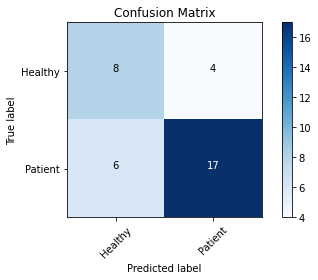

In [51]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Healthy','Patient'],
                      title='Confusion Matrix')

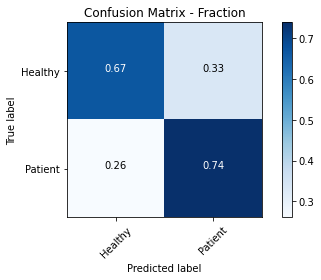

In [52]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Healthy','Patient'],
                      title='Confusion Matrix - Fraction', normalize=True)

In [53]:
metrics = [binary_classifier_metrics(df['Classification'], df['predicted_class'])]
df_metrics=pd.DataFrame.from_dict(metrics)
df_metrics.index = ['Model']

In [54]:
metrics

[{'TruePositive': 8,
  'TrueNegative': 17,
  'FalsePositive': 6,
  'FalseNegative': 4,
  'Positive': 12,
  'Negative': 23,
  'Recall': 0.6666666666666666,
  'TrueNegativeRate': 0.7391304347826086,
  'Precision': 0.5714285714285714,
  'Accuracy': 0.7142857142857143,
  'FalsePositiveRate': 0.2608695652173913,
  'FalseNegativeRate': 0.3333333333333333,
  'F1': 0.6153846153846153}]

In [55]:
df_metrics

,TruePositive,TrueNegative,FalsePositive,FalseNegative,Positive,Negative,Recall,TrueNegativeRate,Precision,Accuracy,FalsePositiveRate,FalseNegativeRate,F1
Model,8,17,6,4,12,23,0.666667,0.73913,0.571429,0.714286,0.26087,0.333333,0.615385


In [56]:
print('Counts')
print(df_metrics[['TruePositive',
                  'FalseNegative',
                  'FalsePositive',
                  'TrueNegative',]].round(2))
print()
print('Fractions')
print(df_metrics[['Recall',
                  'FalseNegativeRate',
                  'FalsePositiveRate',
                  'TrueNegativeRate',]].round(2))
print()

print(df_metrics[['Precision',
                  'Accuracy',
                  'F1']].round(2))

Counts
       TruePositive  FalseNegative  FalsePositive  TrueNegative
Model             8              4              6            17

Fractions
       Recall  FalseNegativeRate  FalsePositiveRate  TrueNegativeRate
Model    0.67               0.33               0.26              0.74

       Precision  Accuracy    F1
Model       0.57      0.71  0.62


In [57]:
print(classification_report(
    df['Classification'],
    df['predicted_class'],
    labels=[1,2],
    target_names=['Healthy','Patient']))

print( accuracy_score(df['Classification'],
    df['predicted_class'],))
print()#Print a new line

              precision    recall  f1-score   support

     Healthy       0.57      0.67      0.62        12
     Patient       0.81      0.74      0.77        23

    accuracy                           0.71        35
   macro avg       0.69      0.70      0.69        35
weighted avg       0.73      0.71      0.72        35

0.7142857142857143

